In [1]:
from sklearn.decomposition import FastICA
from matplotlib import pyplot as plt
from scipy import signal
import numpy as np

In [2]:
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)
s1 = np.sin(2 * time)
s2 = np.sign(np.sin(3 * time))
s3 = signal.sawtooth(2 * np.pi * time)

In [3]:
S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)
S /= S.std(axis=0)
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])
X = np.dot(S, A.T)

In [4]:
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)

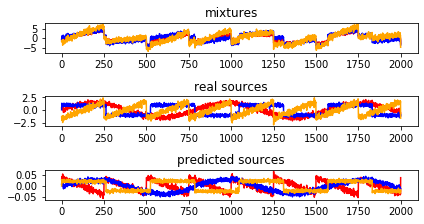

In [5]:
fig = plt.figure()
models = [X, S, S_]
names = ['mixtures', 'real sources', 'predicted sources']
colors = ['red', 'blue', 'orange']
for i, (name, model) in enumerate(zip(names, models)):
    plt.subplot(4, 1, i+1)
    plt.title(name)
    for sig, color in zip (model.T, colors):
        plt.plot(sig, color=color)
        
fig.tight_layout()        
plt.show()